<a href="https://colab.research.google.com/github/dotiyal/Hello-ML-World/blob/master/Head_Size_vs_Brain_Weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Head Size vs Brain Weight

In [98]:
# Importing Necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
# Reading Data
df = pd.read_csv('/content/head_brain.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [101]:
df.isnull().sum()
# Our dataset has no categorical values we can move forward.
# we don't have any null values in our dataset.

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [102]:
df.shape

(237, 4)

# Collecting X and Y

In [103]:
# Collecting x and y variables
X = df['Head Size(cm^3)'].values
Y =  df['Brain Weight(grams)'].values

In [104]:
X.shape, Y.shape

((237,), (237,))

# Method 1: Manual Coding

In [105]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Total number of values
n = len(X)

numerator = 0
denominator = 0

# Using the formula to calculate m and c
for i in range(n):
    numerator += (X[i]-mean_X)* (Y[i]-mean_Y)
    denominator +=(X[i]-mean_X)**2
m = numerator/denominator
c = mean_Y - (m*mean_X)

# Print coefficients
print(m, c)

0.26342933948939945 325.57342104944223


# Plotting values and Regression line

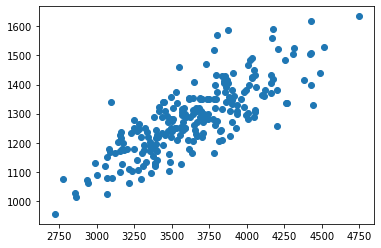

In [106]:
plt.scatter(X, Y)

# Creating Dummy Test Set

In [107]:
min_x = np.min(X) - 100
max_x = np.max(X) + 100

In [108]:
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)

In [109]:
y = m * x + c

Text(0, 0.5, 'Brain weight in grams')

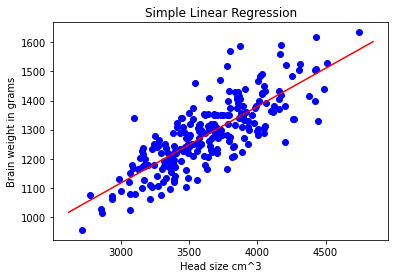

In [110]:
#plotting Scatter Points
plt.scatter(X,Y,color='b', label='Scatter Plot')

# Plotting line
plt.plot(x,y,color='r', label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('Head size cm^3')
plt.ylabel('Brain weight in grams')

# Calculating The Error

In [111]:
sum_pred = 0
sum_act = 0

for i in range(n):
    y_pred = (m*X[i]+c)
    sum_pred += (Y[i]-y_pred)**2
    sum_act +=(Y[i]-mean_Y)**2

r2 = 1-(sum_pred/sum_act)
print(r2) # Here we can observe that we got R**2> 0.5 . so we have good model

0.6393117199570003


In [112]:
def predict(x):
    y = m*x + c
    print(y)

In [113]:
predict(4177)
# here we predict the brain wieght for given head size(cm^3)

1425.9177720966638


# Method 2: using scikit learn

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X  = X.reshape((n,1))

In [115]:
X.shape

(237, 1)

In [116]:
y.shape

(1000,)

In [117]:
lg = LinearRegression()
lg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
# Y prediction
y_pred = lg.predict(X)

mse = mean_squared_error(Y,y_pred)
rmse = np.sqrt(mse)

# Calculating R2 Score
r2_score = lg.score(X,Y)

In [119]:
print(rmse)
print(r2_score)
# we got the same error R**2 value as above method-1

72.1206213783709
0.639311719957


In [120]:
lg.predict([[4177]])

array([1425.9177721])

In [121]:
lg.intercept_

325.5734210494426